In [ ]:
import pandas as pd

df=pd.read_csv("/content/india-districts-census-2011.csv")

print(df.shape[1])


118


In [ ]:
selected_columns = [
    'State name', 'District name', 'Population',
    'Literate_Education', 'Illiterate_Education',
    'Below_Primary_Education', 'Primary_Education', 'Middle_Education',
    'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education',
    'Workers', 'Main_Workers', 'Marginal_Workers', 'Non_Workers',
    'Male_Workers', 'Female_Workers'
]

df_selected = df[selected_columns]

# Check for missing values
print(df_selected.isnull().sum())



State name                 0
District name              0
Population                 0
Literate_Education         0
Illiterate_Education       0
Below_Primary_Education    0
Primary_Education          0
Middle_Education           0
Secondary_Education        0
Higher_Education           0
Graduate_Education         0
Other_Education            0
Workers                    0
Main_Workers               0
Marginal_Workers           0
Non_Workers                0
Male_Workers               0
Female_Workers             0
dtype: int64


In [ ]:
# Preview data
df_selected.head()

,State name,District name,Population,Literate_Education,Illiterate_Education,Below_Primary_Education,Primary_Education,Middle_Education,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Workers,Main_Workers,Marginal_Workers,Non_Workers,Male_Workers,Female_Workers
0,JAMMU AND KASHMIR,Kupwara,870354,405015,289765,60616,101642,99947,74948,39709,21751,6402,229064,123837,105227,641290,190899,38165
1,JAMMU AND KASHMIR,Badgam,753745,374972,342646,68336,80862,83141,66459,41367,27950,6857,214866,132003,82863,538879,162578,52288
2,JAMMU AND KASHMIR,Leh(Ladakh),133487,75493,32637,10452,15181,17900,16265,8923,6197,575,75079,57125,17954,58408,53265,21814
3,JAMMU AND KASHMIR,Kargil,140802,82938,39854,12732,19083,20874,16938,9826,3077,408,51873,28941,22932,88929,39839,12034
4,JAMMU AND KASHMIR,Punch,476835,288430,164044,55762,72024,69219,46062,29517,13962,1884,161393,73247,88146,315442,117677,43716


In [ ]:
# Fill missing values (e.g., with 0)
df_selected_clean = df_selected.fillna(0)

In [ ]:
print(df_selected.describe())


         Population  Literate_Education  Illiterate_Education  \
count  6.400000e+02        6.400000e+02          6.400000e+02   
mean   1.891961e+06        1.275159e+06          5.786784e+05   
std    1.544380e+06        1.133411e+06          4.887864e+05   
min    8.004000e+03        4.926000e+03          2.185000e+03   
25%    8.178610e+05        5.032555e+05          2.142040e+05   
50%    1.557367e+06        1.017248e+06          4.529330e+05   
75%    2.583551e+06        1.718576e+06          7.833772e+05   
max    1.106015e+07        8.886074e+06          3.031841e+06   

       Below_Primary_Education  Primary_Education  Middle_Education  \
count             6.400000e+02       6.400000e+02      6.400000e+02   
mean              2.372994e+05       3.217925e+05      2.616792e+05   
std               2.089869e+05       2.756872e+05      2.533510e+05   
min               6.960000e+02       1.258000e+03      1.060000e+03   
25%               9.070025e+04       1.311078e+05      1.01

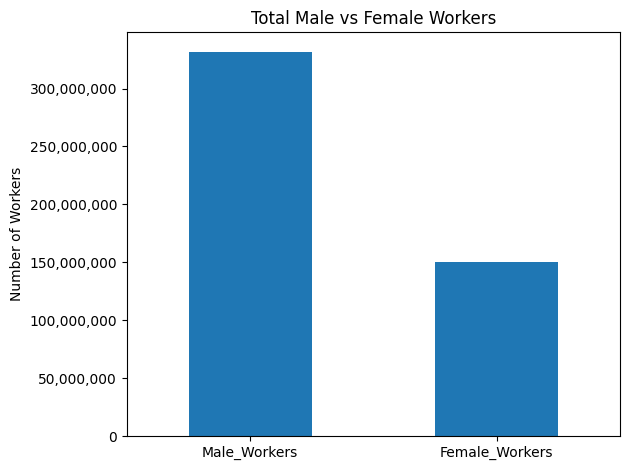

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sum up male and female workers
worker_totals = df_selected[['Male_Workers', 'Female_Workers']].sum()

# Create bar plot
fig, ax = plt.subplots()
worker_totals.plot(kind='bar', ax=ax)

# Set title and labels
ax.set_title("Total Male vs Female Workers")
ax.set_ylabel("Number of Workers")

# Format y-axis to use commas instead of scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


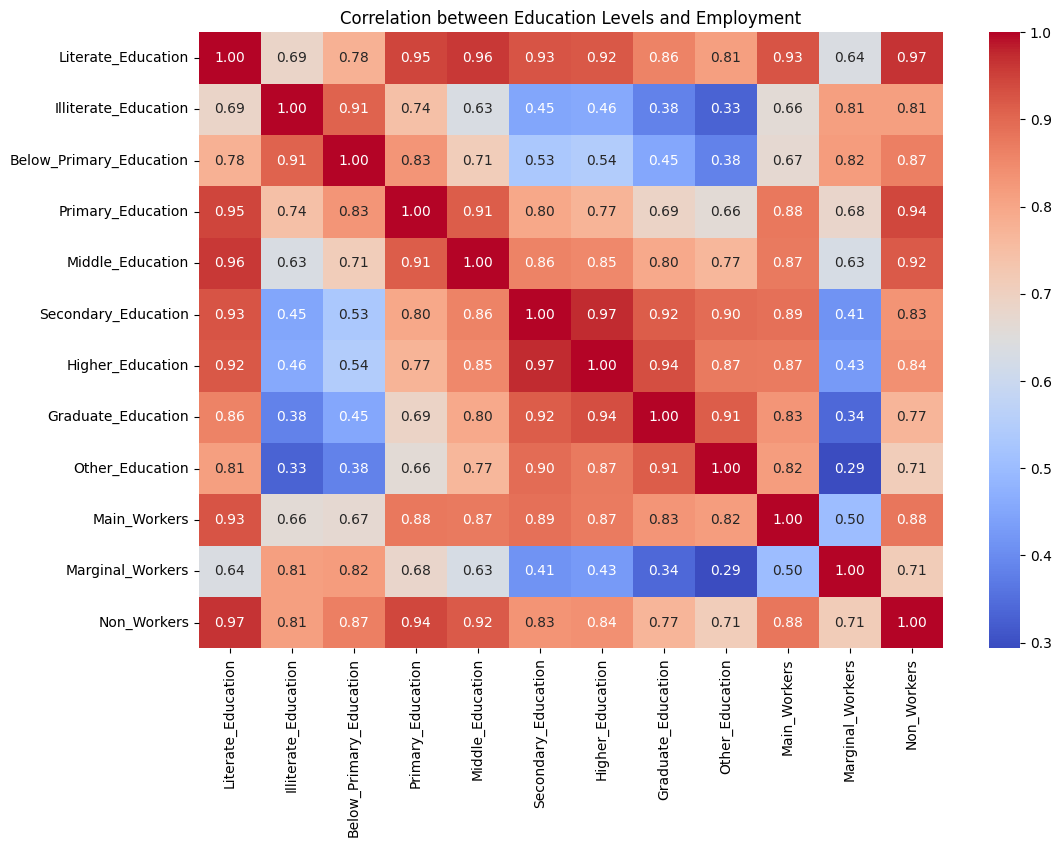

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select education and worker columns for correlation
education_worker_cols = [
    'Literate_Education', 'Illiterate_Education',
    'Below_Primary_Education', 'Primary_Education', 'Middle_Education',
    'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education',
    'Main_Workers', 'Marginal_Workers', 'Non_Workers'
]

# Compute correlation matrix
corr_matrix = df_selected[education_worker_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Education Levels and Employment")
plt.show()


In [ ]:
# Group by state and sum up the values
state_grouped = df_selected.groupby('State name').sum(numeric_only=True).reset_index()

# View the first few rows
print(state_grouped[['State name', 'Graduate_Education', 'Main_Workers', 'Non_Workers']].head())


                    State name  Graduate_Education  Main_Workers  Non_Workers
0  ANDAMAN AND NICOBAR ISLANDS               28821        125910       228046
1               ANDHRA PRADESH             5069999      33037378     45157871
2            ARUNACHAL PRADESH               60298        478721       796070
3                        ASSAM             1017971       8687123     19235886
4                        BIHAR             3346072      21359611     69374465


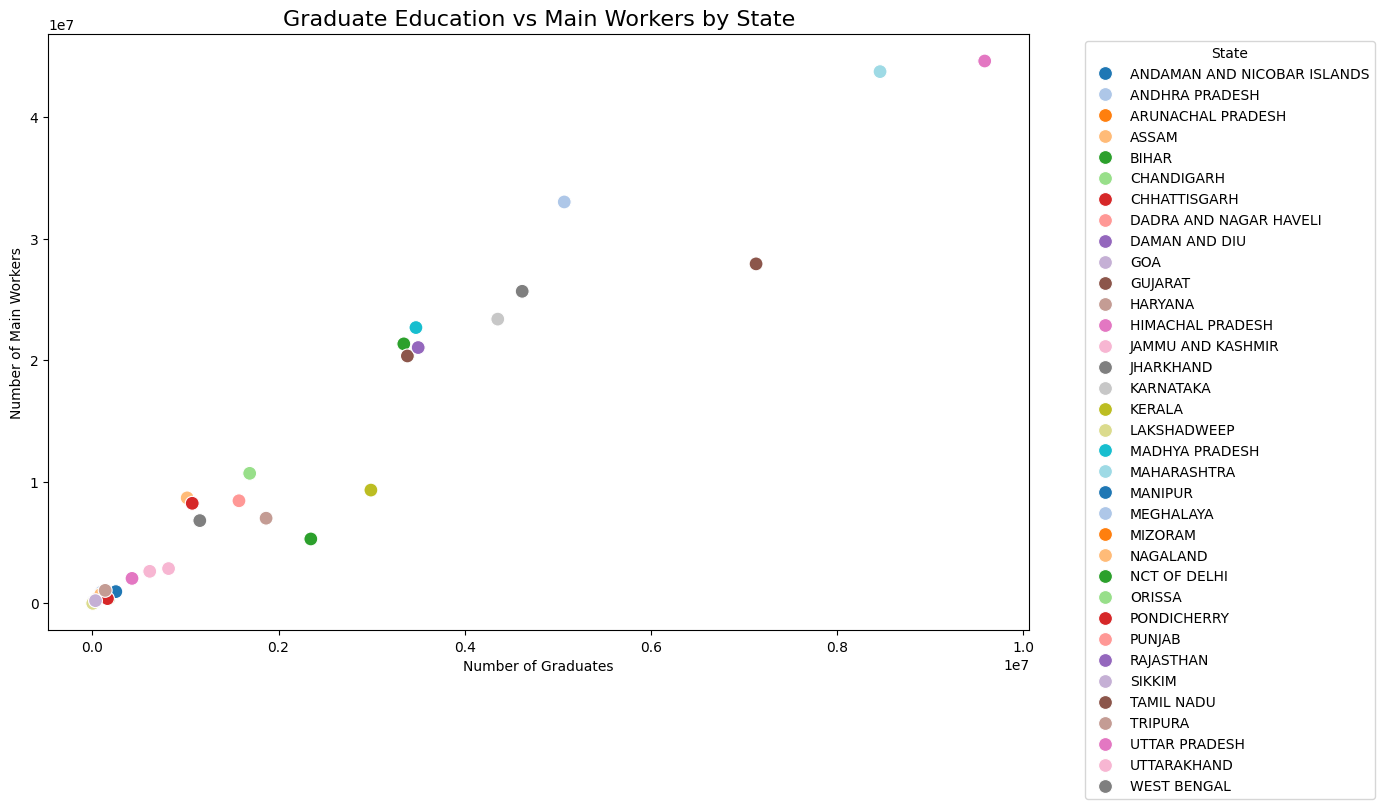

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=state_grouped,
    x='Graduate_Education',
    y='Main_Workers',
    hue='State name',       # Color by state
    palette='tab20',
    s=100                    # Size of the dots
)

plt.title("Graduate Education vs Main Workers by State", fontsize=16)
plt.xlabel("Number of Graduates")
plt.ylabel("Number of Main Workers")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State')  # Show legend outside
plt.tight_layout()
plt.show()


In [ ]:
# Top 5 states by number of graduates
top_5_graduates = state_grouped.nlargest(5, 'Graduate_Education')[['State name', 'Graduate_Education']]

# Top 5 states by number of main workers
top_5_workers = state_grouped.nlargest(5, 'Main_Workers')[['State name', 'Main_Workers']]

print("Top 5 States by Graduate Education:\n", top_5_graduates)
print("\nTop 5 States by Main Workers:\n", top_5_workers)


Top 5 States by Graduate Education:
         State name  Graduate_Education
32   UTTAR PRADESH             9588223
19     MAHARASHTRA             8463507
30      TAMIL NADU             7131256
1   ANDHRA PRADESH             5069999
34     WEST BENGAL             4618160

Top 5 States by Main Workers:
         State name  Main_Workers
32   UTTAR PRADESH      44635492
19     MAHARASHTRA      43762890
1   ANDHRA PRADESH      33037378
30      TAMIL NADU      27942181
34     WEST BENGAL      25686630


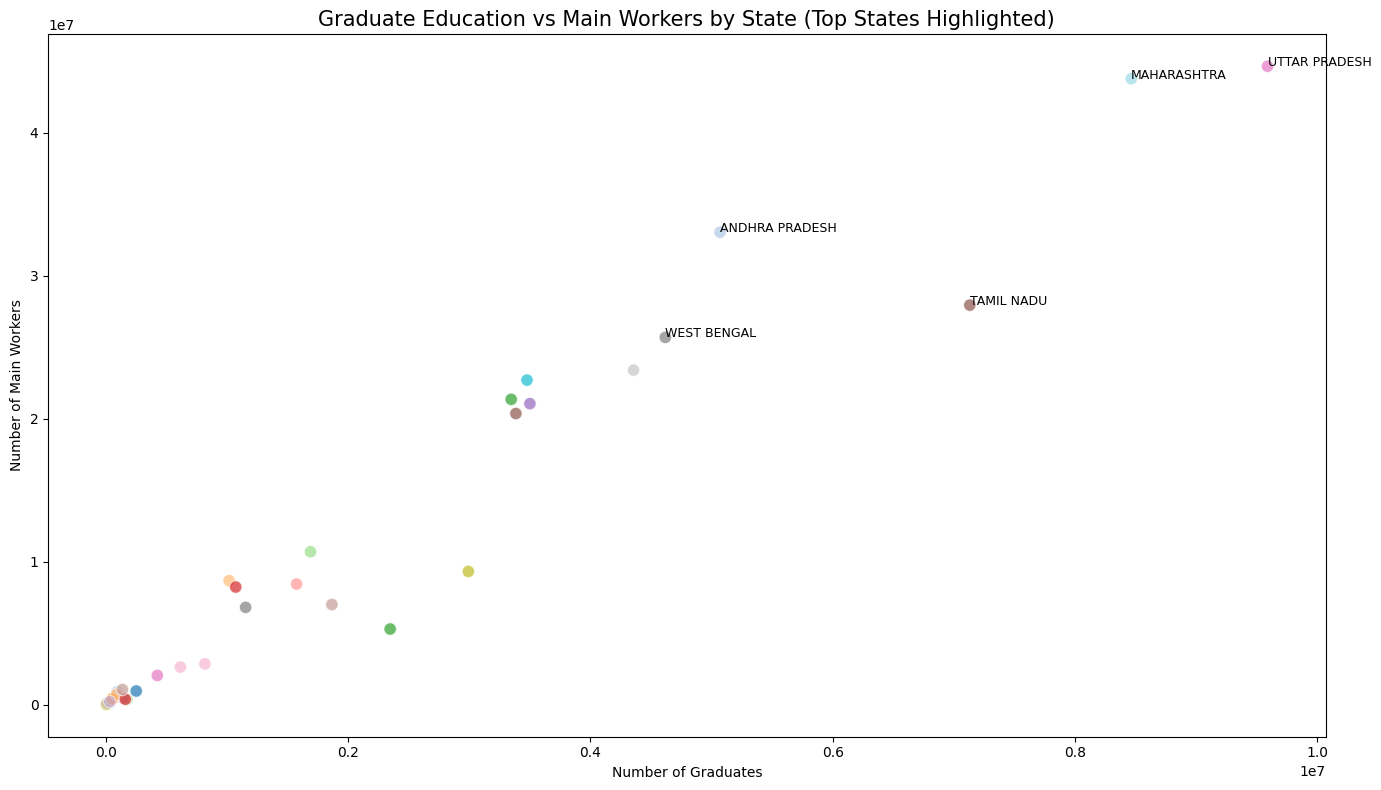

In [ ]:
plt.figure(figsize=(14, 8))

# Base scatter plot
sns.scatterplot(
    data=state_grouped,
    x='Graduate_Education',
    y='Main_Workers',
    hue='State name',
    palette='tab20',
    legend=False,
    s=80,
    alpha=0.7
)

# Highlight top 5 states by graduates
for i, row in top_5_graduates.iterrows():
    plt.text(row['Graduate_Education'],
             state_grouped[state_grouped['State name'] == row['State name']]['Main_Workers'].values[0],
             row['State name'],
             fontsize=9,
             color='black')

# Highlight top 5 states by workers
for i, row in top_5_workers.iterrows():
    if row['State name'] not in top_5_graduates['State name'].values:
        plt.text(row['Graduate_Education'],
                 row['Main_Workers'],
                 row['State name'],
                 fontsize=9,
                 color='blue')

plt.title("Graduate Education vs Main Workers by State (Top States Highlighted)", fontsize=15)
plt.xlabel("Number of Graduates")
plt.ylabel("Number of Main Workers")
plt.tight_layout()
plt.show()


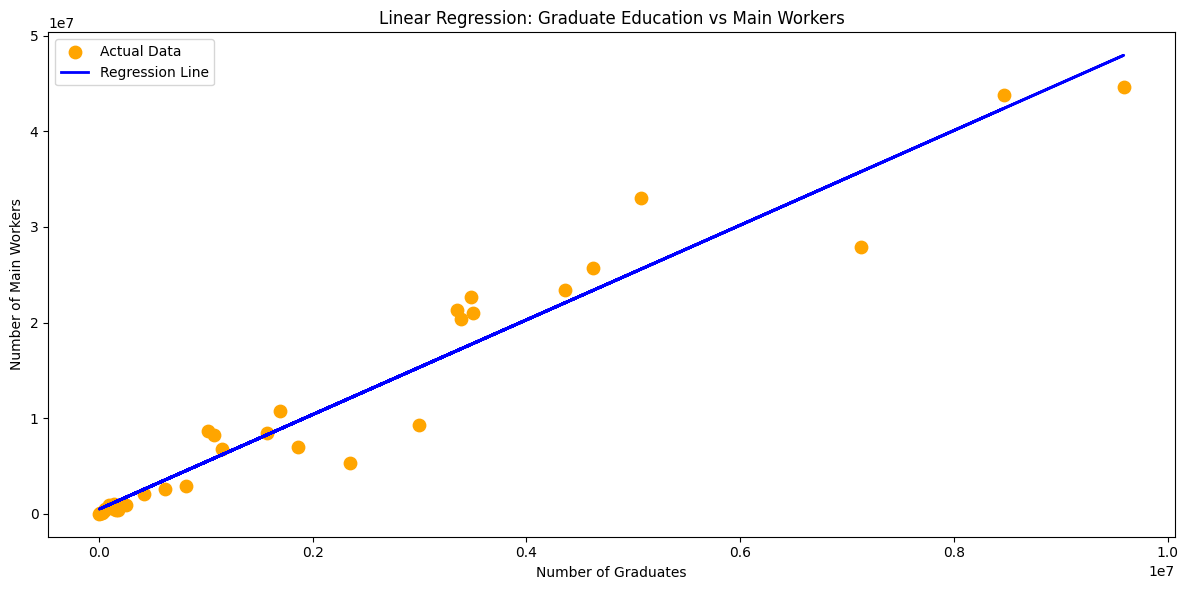

📈 Slope (Coefficient): 4.95
📉 Intercept: 490733.27
📊 R-squared Score: 0.9434


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = state_grouped[['Graduate_Education']].values  # Feature (input)
y = state_grouped['Main_Workers'].values          # Target (output)

# Step 2: Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict values using the trained model
y_pred = model.predict(X)

# Step 4: Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Actual Data', color='orange', s=80)
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regression Line')

plt.title("Linear Regression: Graduate Education vs Main Workers")
plt.xlabel("Number of Graduates")
plt.ylabel("Number of Main Workers")
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Print model details
print("📈 Slope (Coefficient):", round(model.coef_[0], 2))
print("📉 Intercept:", round(model.intercept_, 2))
print("📊 R-squared Score:", round(model.score(X, y), 4))


In [ ]:
# Calculate the average number of graduates
avg_graduates = state_grouped['Graduate_Education'].mean()

# Filter states with below-average graduates
low_grad_states = state_grouped[state_grouped['Graduate_Education'] < avg_graduates].copy()

# Predict workforce numbers using our regression model
low_grad_states['Predicted_Main_Workers'] = model.predict(low_grad_states[['Graduate_Education']])

# Display a few of them
print(low_grad_states[['State name', 'Graduate_Education', 'Main_Workers', 'Predicted_Main_Workers']])


                     State name  Graduate_Education  Main_Workers  \
0   ANDAMAN AND NICOBAR ISLANDS               28821        125910   
2             ARUNACHAL PRADESH               60298        478721   
3                         ASSAM             1017971       8687123   
5                    CHANDIGARH              174528        385929   
6                  CHHATTISGARH             1072482       8241714   
7        DADRA AND NAGAR HAVELI               19655        130299   
8                 DAMAN AND DIU               11034        116435   
9                           GOA              144241        476053   
11                      HARYANA             1866017       7015283   
12             HIMACHAL PRADESH              425328       2062501   
13            JAMMU AND KASHMIR              615858       2644149   
14                    JHARKHAND             1154047       6818595   
17                  LAKSHADWEEP                3491         10804   
20                      MANIPUR   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


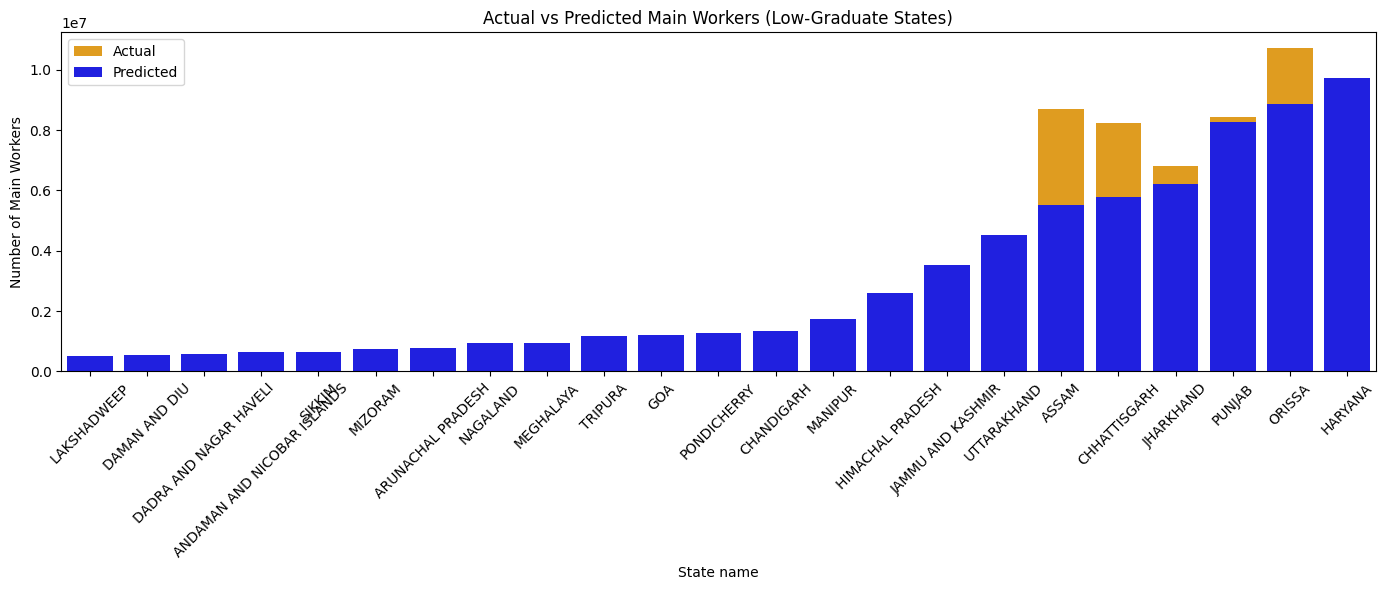

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.barplot(
    data=low_grad_states.sort_values('Graduate_Education'),
    x='State name',
    y='Main_Workers',
    color='orange',
    label='Actual'
)

sns.barplot(
    data=low_grad_states.sort_values('Graduate_Education'),
    x='State name',
    y='Predicted_Main_Workers',
    color='blue',
    label='Predicted'
)

plt.xticks(rotation=45)
plt.title("Actual vs Predicted Main Workers (Low-Graduate States)")
plt.ylabel("Number of Main Workers")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(
    state_grouped,
    x='Graduate_Education',
    y='Main_Workers',
    text='State name',
    size='Graduate_Education',
    color='Graduate_Education',
    hover_data=['State name', 'Main_Workers', 'Graduate_Education'],
    title="Graduate Education vs Main Workers by State (Interactive)"
)

fig.update_traces(textposition='top center')
fig.update_layout(height=600)
fig.show()
